<a href="https://colab.research.google.com/github/yenlung/Python-AI-Book/blob/main/%E5%86%92%E9%9A%AA_%E5%BC%B7%E5%8C%96%E5%AD%B8%E7%BF%92_%E7%AD%96%E7%95%A5%E5%A0%B1%E9%85%AC%E6%AF%94%E8%BC%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [26]:
def time(df):
  df['TIME'] = pd.to_datetime(df['TIME'])
  df=df.set_index(df.TIME)
  return df

# 買入持有策略資料

In [27]:
#stock_data
df_1 = pd.read_csv('stock_data.csv')
df_1

,TIME,OPEN,MAX,MIN,CLOSE
0,2010-01-04,65.0,65.0,64.0,64.9
1,2010-01-05,65.0,65.1,63.9,64.5
2,2010-01-06,64.5,64.9,63.7,64.9
3,2010-01-07,64.9,65.0,64.2,64.2
4,2010-01-08,63.5,64.3,63.5,64.0
...,...,...,...,...,...
2949,2021-12-24,606.0,609.0,604.0,604.0
2950,2021-12-27,604.0,610.0,604.0,606.0
2951,2021-12-28,610.0,615.0,610.0,615.0
2952,2021-12-29,615.0,619.0,614.0,616.0


In [28]:
#篩選出2021年度數據
df_1=df_1[df_1['TIME']>='2021-01-01']
df_1.reset_index(drop=True, inplace=True)
df_1

,TIME,OPEN,MAX,MIN,CLOSE
0,2021-01-04,530.0,540.0,528.0,536.0
1,2021-01-05,536.0,542.0,535.0,542.0
2,2021-01-06,555.0,555.0,541.0,549.0
3,2021-01-07,554.0,570.0,553.0,565.0
4,2021-01-08,580.0,580.0,571.0,580.0
...,...,...,...,...,...
239,2021-12-24,606.0,609.0,604.0,604.0
240,2021-12-27,604.0,610.0,604.0,606.0
241,2021-12-28,610.0,615.0,610.0,615.0
242,2021-12-29,615.0,619.0,614.0,616.0


In [29]:
#計算stock_data日報酬
df_1['日報酬'] = ''
for i in range(1,len(df_1)):
  df_1['日報酬'][i] = df_1['CLOSE'][i]/df_1['CLOSE'][i-1]-1

df_1['1+日報酬'] = ''
for i in range(1,len(df_1)):
  df_1['1+日報酬'][i] = df_1['日報酬'][i]+1

df_1['相乘'] = ''
a = 1
for i in range(1,len(df_1)):  
  a *= df_1['1+日報酬'][i]
  df_1['相乘'][i] = a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [30]:
df_1=time(df_1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
#相乘 累積報酬，畫圖畫出曲線變化
df_1

,TIME,OPEN,MAX,MIN,CLOSE,日報酬,1+日報酬,相乘
TIME,,,,,,,,
2021-01-04,2021-01-04,530.0,540.0,528.0,536.0,,,
2021-01-05,2021-01-05,536.0,542.0,535.0,542.0,0.011194,1.011194,1.011194
2021-01-06,2021-01-06,555.0,555.0,541.0,549.0,0.012915,1.012915,1.024254
2021-01-07,2021-01-07,554.0,570.0,553.0,565.0,0.029144,1.029144,1.054104
2021-01-08,2021-01-08,580.0,580.0,571.0,580.0,0.026549,1.026549,1.08209
...,...,...,...,...,...,...,...,...
2021-12-24,2021-12-24,606.0,609.0,604.0,604.0,-0.0033,0.9967,1.126866
2021-12-27,2021-12-27,604.0,610.0,604.0,606.0,0.003311,1.003311,1.130597
2021-12-28,2021-12-28,610.0,615.0,610.0,615.0,0.014851,1.014851,1.147388


# rl模型資料

In [32]:
#匯入RL訓練出來的結果
rl_1 =pd.read_csv('1.csv')
rl_1

,Unnamed: 0,state,action,reward,q
0,2690,OPEN MAX MIN CLOSE\nTIME ...,1,0.000000,0.000000
1,2691,OPEN MAX MIN CLOSE\nTIME ...,0,0.011194,0.011194
2,2692,OPEN MAX MIN CLOSE\nTIME ...,0,0.012915,0.012915
3,2693,OPEN MAX MIN CLOSE\nTIME ...,0,0.029144,0.029144
4,2694,OPEN MAX MIN CLOSE\nTIME ...,0,0.026549,0.026549
...,...,...,...,...,...
239,2929,OPEN MAX MIN CLOSE\nTIME ...,0,-0.003300,-0.003300
240,2930,OPEN MAX MIN CLOSE\nTIME ...,0,0.003311,0.003311
241,2931,OPEN MAX MIN CLOSE\nTIME ...,0,0.014851,0.014851
242,2932,OPEN MAX MIN CLOSE\nTIME ...,0,0.001626,0.001626


In [33]:
rl_1[rl_1.state.isnull()]

,Unnamed: 0,state,action,reward,q


In [35]:
rl_1.state[0] #2021/1/4-2021/1/29
rl_1.state[1] #2021/1/5-2021/2/1

'             OPEN    MAX    MIN  CLOSE\nTIME                                  \n2020-12-07  512.0  515.0  506.0  514.0\n2020-12-08  514.0  525.0  509.0  524.0\n2020-12-09  521.0  524.0  520.0  520.0\n2020-12-10  511.0  515.0  510.0  512.0\n2020-12-11  517.0  517.0  505.0  516.0\n2020-12-14  512.0  513.0  508.0  508.0\n2020-12-15  507.0  510.0  504.0  504.0\n2020-12-16  509.0  515.0  507.0  512.0\n2020-12-17  515.0  515.0  508.0  508.0\n2020-12-18  508.0  512.0  507.0  510.0\n2020-12-21  512.0  517.0  508.0  516.0\n2020-12-22  512.0  516.0  509.0  509.0\n2020-12-23  508.0  511.0  506.0  509.0\n2020-12-24  511.0  512.0  508.0  510.0\n2020-12-25  514.0  515.0  510.0  511.0\n2020-12-28  512.0  515.0  509.0  515.0\n2020-12-29  515.0  517.0  513.0  515.0\n2020-12-30  516.0  525.0  514.0  525.0\n2020-12-31  526.0  530.0  524.0  530.0\n2021-01-04  530.0  540.0  528.0  536.0'

In [36]:
rl_1

,Unnamed: 0,state,action,reward,q
0,2690,OPEN MAX MIN CLOSE\nTIME ...,1,0.000000,0.000000
1,2691,OPEN MAX MIN CLOSE\nTIME ...,0,0.011194,0.011194
2,2692,OPEN MAX MIN CLOSE\nTIME ...,0,0.012915,0.012915
3,2693,OPEN MAX MIN CLOSE\nTIME ...,0,0.029144,0.029144
4,2694,OPEN MAX MIN CLOSE\nTIME ...,0,0.026549,0.026549
...,...,...,...,...,...
239,2929,OPEN MAX MIN CLOSE\nTIME ...,0,-0.003300,-0.003300
240,2930,OPEN MAX MIN CLOSE\nTIME ...,0,0.003311,0.003311
241,2931,OPEN MAX MIN CLOSE\nTIME ...,0,0.014851,0.014851
242,2932,OPEN MAX MIN CLOSE\nTIME ...,0,0.001626,0.001626


#RL與買入持有策略放一起

In [38]:
rl_2 = df_1.copy()
rl_2

,TIME,OPEN,MAX,MIN,CLOSE,日報酬,1+日報酬,相乘
TIME,,,,,,,,
2021-01-04,2021-01-04,530.0,540.0,528.0,536.0,,,
2021-01-05,2021-01-05,536.0,542.0,535.0,542.0,0.011194,1.011194,1.011194
2021-01-06,2021-01-06,555.0,555.0,541.0,549.0,0.012915,1.012915,1.024254
2021-01-07,2021-01-07,554.0,570.0,553.0,565.0,0.029144,1.029144,1.054104
2021-01-08,2021-01-08,580.0,580.0,571.0,580.0,0.026549,1.026549,1.08209
...,...,...,...,...,...,...,...,...
2021-12-24,2021-12-24,606.0,609.0,604.0,604.0,-0.0033,0.9967,1.126866
2021-12-27,2021-12-27,604.0,610.0,604.0,606.0,0.003311,1.003311,1.130597
2021-12-28,2021-12-28,610.0,615.0,610.0,615.0,0.014851,1.014851,1.147388


In [39]:
rl_2.loc[['2021-02-01']]

,TIME,OPEN,MAX,MIN,CLOSE,日報酬,1+日報酬,相乘
TIME,,,,,,,,
2021-02-01,2021-02-01,595.0,612.0,587.0,611.0,0.033841,1.033841,1.139925


In [40]:
# 強化學習第一筆reward，為2021-01-04啟20天，2021-02-01開始計算報酬
rl_2.iloc[20]

TIME     2021-02-01 00:00:00
OPEN                   595.0
MAX                    612.0
MIN                    587.0
CLOSE                  611.0
日報酬                 0.033841
1+日報酬               1.033841
相乘                  1.139925
Name: 2021-02-01 00:00:00, dtype: object

In [41]:
#計算stock_data日報酬
rl_2['rl_reward'] = ''

for i in range(224):
  rl_2['rl_reward'][20+i] = rl_1.reward[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [42]:
rl_2

,TIME,OPEN,MAX,MIN,CLOSE,日報酬,1+日報酬,相乘,rl_reward
TIME,,,,,,,,,
2021-01-04,2021-01-04,530.0,540.0,528.0,536.0,,,,
2021-01-05,2021-01-05,536.0,542.0,535.0,542.0,0.011194,1.011194,1.011194,
2021-01-06,2021-01-06,555.0,555.0,541.0,549.0,0.012915,1.012915,1.024254,
2021-01-07,2021-01-07,554.0,570.0,553.0,565.0,0.029144,1.029144,1.054104,
2021-01-08,2021-01-08,580.0,580.0,571.0,580.0,0.026549,1.026549,1.08209,
...,...,...,...,...,...,...,...,...,...
2021-12-24,2021-12-24,606.0,609.0,604.0,604.0,-0.0033,0.9967,1.126866,-0.011609
2021-12-27,2021-12-27,604.0,610.0,604.0,606.0,0.003311,1.003311,1.130597,-0.005034
2021-12-28,2021-12-28,610.0,615.0,610.0,615.0,0.014851,1.014851,1.147388,0.005059


In [43]:
rl_2['1+rl日報酬'] = ''
for i in range(20,len(rl_2)):
  rl_2['1+rl日報酬'][i] = rl_2['rl_reward'][i]+1

rl_2['rl相乘'] = ''
a = 1
for i in range(20,len(rl_2)):  
  a *= rl_2['1+rl日報酬'][i]
  rl_2['rl相乘'][i] = a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [44]:
rl_2

,TIME,OPEN,MAX,MIN,CLOSE,日報酬,1+日報酬,相乘,rl_reward,1+rl日報酬,rl相乘
TIME,,,,,,,,,,,
2021-01-04,2021-01-04,530.0,540.0,528.0,536.0,,,,,,
2021-01-05,2021-01-05,536.0,542.0,535.0,542.0,0.011194,1.011194,1.011194,,,
2021-01-06,2021-01-06,555.0,555.0,541.0,549.0,0.012915,1.012915,1.024254,,,
2021-01-07,2021-01-07,554.0,570.0,553.0,565.0,0.029144,1.029144,1.054104,,,
2021-01-08,2021-01-08,580.0,580.0,571.0,580.0,0.026549,1.026549,1.08209,,,
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,2021-12-24,606.0,609.0,604.0,604.0,-0.0033,0.9967,1.126866,-0.011609,0.988391,1.153935
2021-12-27,2021-12-27,604.0,610.0,604.0,606.0,0.003311,1.003311,1.130597,-0.005034,0.994966,1.148126
2021-12-28,2021-12-28,610.0,615.0,610.0,615.0,0.014851,1.014851,1.147388,0.005059,1.005059,1.153935


# 畫圖

In [45]:
import matplotlib.gridspec as gridspec

In [46]:
#某列更換成數值類型_使用pd.to_numeric
df_1['相乘']=pd.to_numeric(df_1['相乘'])
rl_2['rl相乘']=pd.to_numeric(rl_2['rl相乘'])

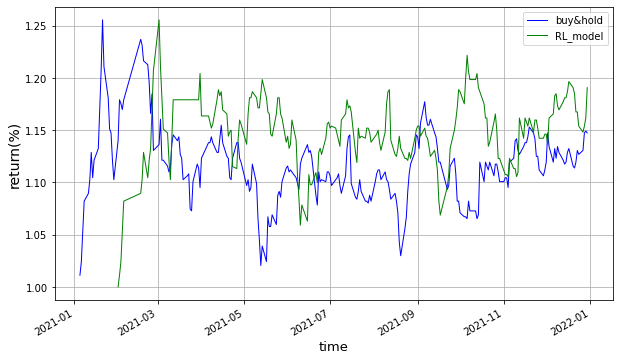

In [47]:
plt.figure(figsize = (10,6))
plt.title('', fontsize = 16)
df_1.相乘.plot(color = 'blue', linewidth = 1)
rl_2.rl相乘.plot(color = 'green', linewidth = 1)

plt.grid()
plt.xlabel('time', fontsize = 13) # X座標名稱
plt.ylabel('return(%)', fontsize = 14) # Y座標名稱
plt.legend(['buy&hold','RL_model'],  bbox_to_anchor=(1, 1));
plt.savefig('績效圖.png') # 儲存圖片;